In [1]:
def data_preprocessing(data_df, text_col, comment_pattern):
    import re
    texts = data_df.iloc[:, text_col]
#     for comment_pattern in comment_patterns:
    texts = [re.sub(comment_pattern, "", str(text)) for text in texts]
#     texts = [re.sub("\n", "", text) for text in texts]
    data_df.iloc[:, text_col] = texts
    data_clean = data_df.fillna('')
    data_clean.columns = ['text', 'label']
    return data_clean

In [2]:
import os
import pandas as pd
os.chdir('/home/qc/Downloads/blueoptima/blueoptima_data/')
cz = 5000
data_java_ori = pd.read_csv('data_sub0.csv', encoding = 'utf-8', chunksize= cz)
data_py_ori = pd.read_csv('data_sub1.csv', encoding = 'utf-8', chunksize= cz)
data_csharp_ori = pd.read_csv('data_sub2.csv', encoding = 'utf-8', chunksize = cz)
data_cpp_ori = pd.read_csv('data_sub3.csv', encoding = 'utf-8', chunksize= cz)

In [3]:
# for java, c#, python and C++
# data_java_clean = data_preprocessing(data_java_ori, 0, '\/\*[\s\S]*?\*\/|([^:]|^)\/\/.*|\\n')
# for python
# data_py_clean = data_preprocessing(data_py_ori, 0, "#.*?\n|\\n")
# data_py_clean = data_preprocessing(data_py_ori, 0, "#.*?\n|\"\"\"[\s\S]*?\"\"\"|\'\'\'[\s\S]*?\'\'\'|\\n")
# data_csharp_clean = data_preprocessing(data_csharp_ori, 0, "\/\*[\s\S]*?\*\/|([^:]|^)\/\/.*|\\n")
# data_cpp_clean = data_preprocessing(data_cpp_ori, 0, "\/\*[\s\S]*?\*\/|([^:]|^)\/\/.*|\\n")

In [4]:
final_data = pd.DataFrame
pattern0 = '\/\*[\s\S]*?\*\/|([^:]|^)\/\/.*|\\n|\\t'
pattern1 = '\/\*[\s\S]*?\*\/|([^:]|^)\/\/.*|\\n|\\t'
for chunk in data_java_ori:
    temp = data_preprocessing(chunk, 0, pattern0)
#     temp.to_csv('final.csv', mode = 'a')
    final_data = pd.concat([final_data, temp])
for chunk in data_py_ori:
    temp = data_preprocessing(chunk, 0, pattern1)
#     temp.to_csv('final.csv', mode = 'a')
    final_data = pd.concat([final_data, temp])
for chunk in data_csharp_ori:
    temp = data_preprocessing(chunk, 0, pattern0)
#     temp.to_csv('final.csv', mode = 'a')
    final_data = pd.concat([final_data, temp])
for chunk in data_cpp_ori:
    temp = data_preprocessing(chunk, 0, pattern0)
    temp.iloc[:, 1] = 'cpp'
#     temp.to_csv('final.csv', mode = 'a')
    final_data = pd.concat([final_data, temp])

In [5]:
# data_java_clean.to_csv('data_java_clean.csv')
# data_py_clean.to_csv('data_py_clean.csv')
# data_csharp_clean.to_csv('data_csharp_clean.csv')
# data_cpp_clean.to_csv('data_cpp_clean.csv')

In [6]:
# import os, pandas as pd
# os.chdir('/home/qc/Downloads/blueoptima/blueoptima_data/')
# data_java = pd.read_csv('data_java_clean.csv')
# data_py = pd.read_csv('data_py_clean.csv')
# data_csharp = pd.read_csv('data_csharp_clean.csv')
# data_cpp = pd.read_csv('data_cpp_clean.csv')

In [7]:
# final_data = pd.concat([data_java, data_py, data_csharp, data_cpp])
# final_data = pd.concat([data_java_clean, data_py_clean, data_csharp_clean, data_cpp_clean])
# final_data = pd.concat([final_data, pd.get_dummies(final_data.loc[:, 'label'])], axis = 1)
# final_data = final_data.drop('label', axis = 1)
# final_data.rename(columns={'.c .cc .cpp .h .hpp':'cpp'}, inplace=True)
# final_data = final_data.iloc[:, 1:]
# final_data.to_csv('final_data.csv')

In [8]:
final_data = pd.concat([final_data, pd.get_dummies(final_data.loc[:, 'label'])], axis = 1)

In [17]:
# final_data.to_csv('final_data.csv', index=False)

In [9]:
# import os, pandas as pd
# os.chdir('/home/qc/Downloads/blueoptima/blueoptima_data/')
# final_data = pd.read_csv('final_data.csv', index_col=False)
# # whenever reading csv files, np.nan is generated. 
# final_data = final_data.fillna('')

final_data.groupby('label')['label'].count()

text_length = pd.DataFrame({'text_length' : [len(text) for text in final_data['text']]})
final_trunc_data = pd.concat([final_data.reset_index(drop = True), text_length], axis = 1)
final_trunc_data.head()

,text,label,.cs,.java,.py,cpp,text_length
0,package retrofit2;import java.io.IOException;i...,.java,0,1,0,0,3090
1,package retrofit2;import java.io.IOException;i...,.java,0,1,0,0,3208
2,package retrofit2;import java.io.IOException;i...,.java,0,1,0,0,31919
3,package retrofit2;import java.lang.annotation....,.java,0,1,0,0,653
4,package retrofit2;import java.io.IOException;i...,.java,0,1,0,0,16386


In [10]:
import matplotlib.pyplot as plt
final_trunc_data.boxplot(column = 'text_length', by = 'label')

from the boxplot we can tell that most of languages have text(character) length below 5e6, so we first set index to below 5e6. It is suspected that those large files will contain many repetitive words that will dominant the real key words.

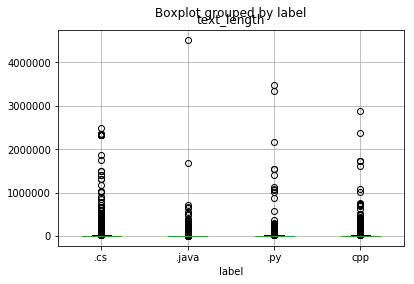

In [11]:
index = [text_length < 5e6 for text_length in final_trunc_data['text_length']]
final_trunc_data = final_trunc_data.iloc[index, :]
final_trunc_data.boxplot(column = 'text_length', by = 'label')

again, most are below 1M

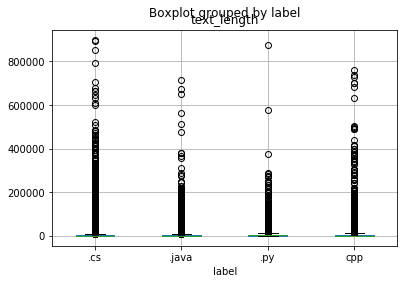

In [12]:
index = [text_length < 1e6 for text_length in final_trunc_data['text_length']]
final_trunc_data = final_trunc_data.iloc[index, :]
final_trunc_data.boxplot(column = 'text_length', by = 'label')

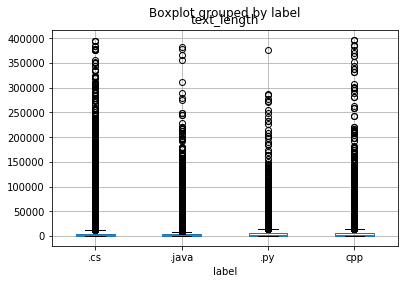

In [13]:
index = [text_length < 400e3 for text_length in final_trunc_data['text_length']]
final_trunc_data = final_trunc_data.iloc[index, :]
final_trunc_data.boxplot(column = 'text_length', by = 'label')

We also want to set the lower limit (or may be not) to increase the computer speed. Those files with very short strings contained may not be representative as the frequency may vary erratically. 

In [14]:
final_trunc_data.groupby('label')['text_length'].quantile(0.25)

label
.cs      502.0
.java    871.0
.py      640.0
cpp      633.0
Name: text_length, dtype: float64

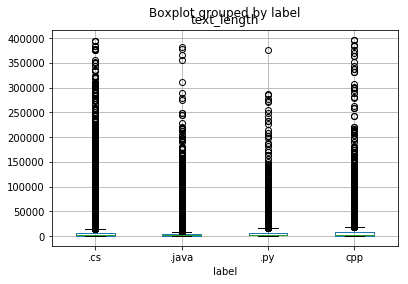

In [15]:
index = [len(text) > 500 for text in final_trunc_data['text']]
final_trunc_data = final_trunc_data.iloc[index, :]
final_trunc_data.boxplot(column = 'text_length', by = 'label')

Now we have restricted the string length per document to be larger than 500 but smaller than 500e3.

In [16]:
final_trunc_data.to_csv('final_trunc_data.csv', index=False)